# Finacial Analysis 
## Project Group-5

# Walmart Stock Analysis

# Monte Carlo Simulation

In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from pandas_datareader import data as pdr
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')
from prophet import Prophet

In [3]:
ticker = 'WMT'
df_yf = pdr.get_data_yahoo(ticker, start='2019-04-08')
df_yf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-08,98.449997,99.250000,98.260002,99.230003,92.826889,5422400
2019-04-09,98.800003,99.230003,98.150002,98.690002,92.321724,4367500
2019-04-10,98.510002,99.720001,98.500000,99.599998,93.173004,4091100
2019-04-11,99.699997,100.830002,99.470001,100.800003,94.295570,5606900
2019-04-12,101.000000,102.019997,101.000000,101.559998,95.006538,5162000
...,...,...,...,...,...,...
2023-04-11,151.000000,151.000000,149.619995,150.070007,150.070007,6123500
2023-04-12,149.789993,150.970001,149.169998,149.339996,149.339996,3736600
2023-04-13,149.649994,150.000000,148.199997,149.490005,149.490005,4424200


In [4]:
data = df_yf[['Adj Close']]
data

,Adj Close
Date,
2019-04-08,92.826889
2019-04-09,92.321724
2019-04-10,93.173004
2019-04-11,94.295570
2019-04-12,95.006538
...,...
2023-04-11,150.070007
2023-04-12,149.339996
2023-04-13,149.490005


<Axes: xlabel='Date'>

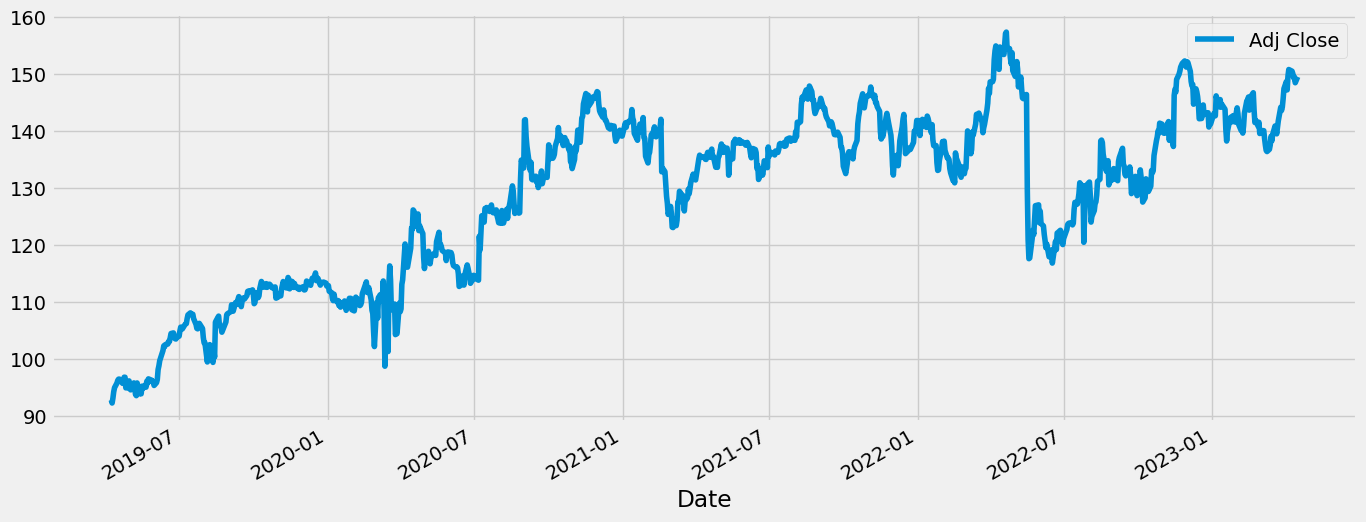

In [5]:
data.plot(figsize=(15,6))

In [6]:
stock_returns = np.log(1 + data.pct_change())
#stock_returns.tail()

Text(0, 0.5, 'Frequency')

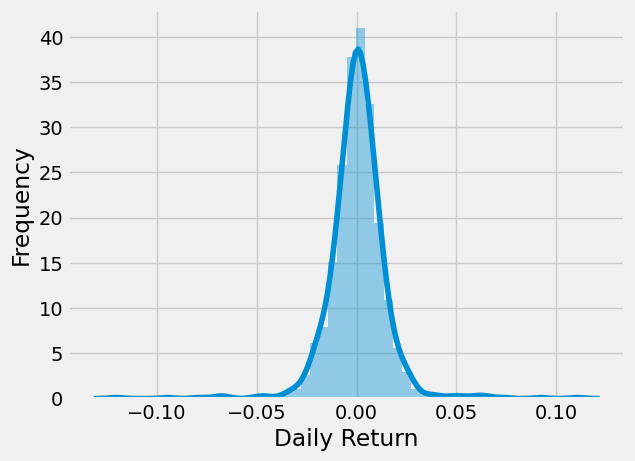

In [7]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<Axes: xlabel='Date'>

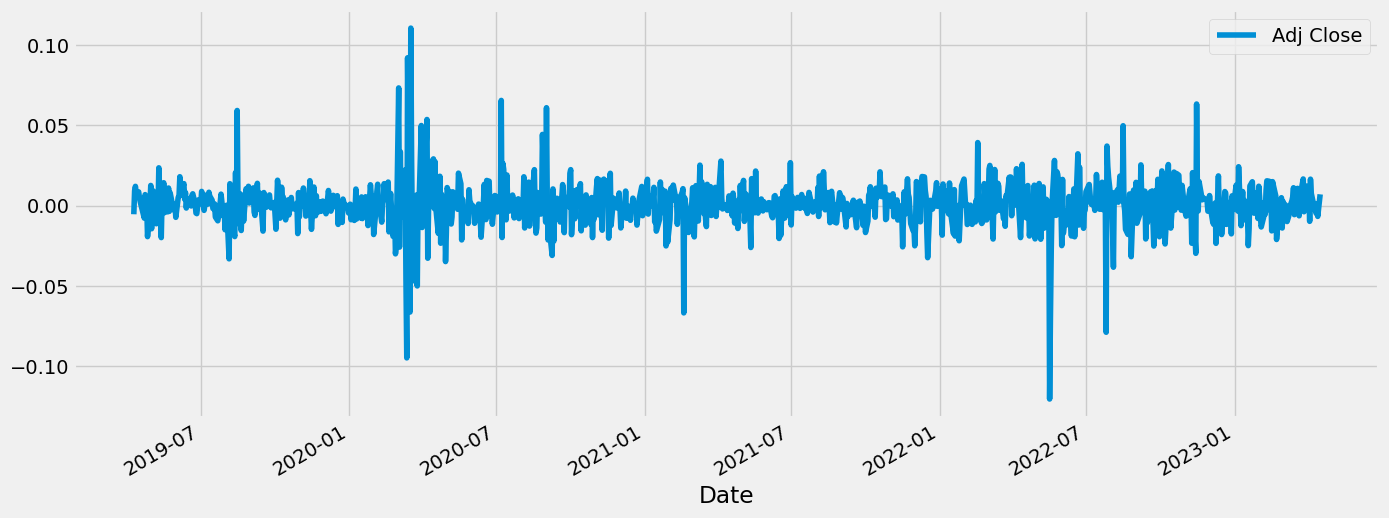

In [8]:
stock_returns.plot(figsize=(15,6))

In [9]:
u = stock_returns.mean()
var = stock_returns.var()

In [10]:
drift = u - (0.5*var)
drift

Adj Close    0.000362
dtype: float64

In [11]:
stddev = stock_returns.std() 
stddev

Adj Close    0.014761
dtype: float64

In [12]:
type(drift)
type(stddev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([0.00036164])

In [14]:
drift.values

array([0.00036164])

In [15]:
stddev.values

array([0.01476084])

In [16]:
x = np.random.rand(10,2)
norm.ppf(x)

array([[ 0.0958414 , -0.39522904],
       [-0.99419846,  1.80617367],
       [-0.45563751, -0.55569469],
       [-0.10919437, -0.07597867],
       [ 0.07827708, -0.77178178],
       [-0.27745453,  0.28246553],
       [ 0.51745961, -0.02852738],
       [-0.83726847, -1.17577034],
       [-1.25060191,  0.94636468],
       [-0.26641727, -0.15330123]])

In [17]:
stdev = stock_returns.std()
days = 30
iterations = 100
Z = norm.ppf(np.random.rand(days, iterations))

In [18]:
get_daily_returns = np.exp(drift.values + stdev.values * Z)

In [20]:
S0 = data.iloc[-1]
S0

Adj Close    149.520004
Name: 2023-04-17 00:00:00, dtype: float64

In [21]:
price_paths = np.zeros_like(get_daily_returns)

In [22]:
price_paths.shape

(30, 100)

In [23]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
price_paths[0] = S0

In [25]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

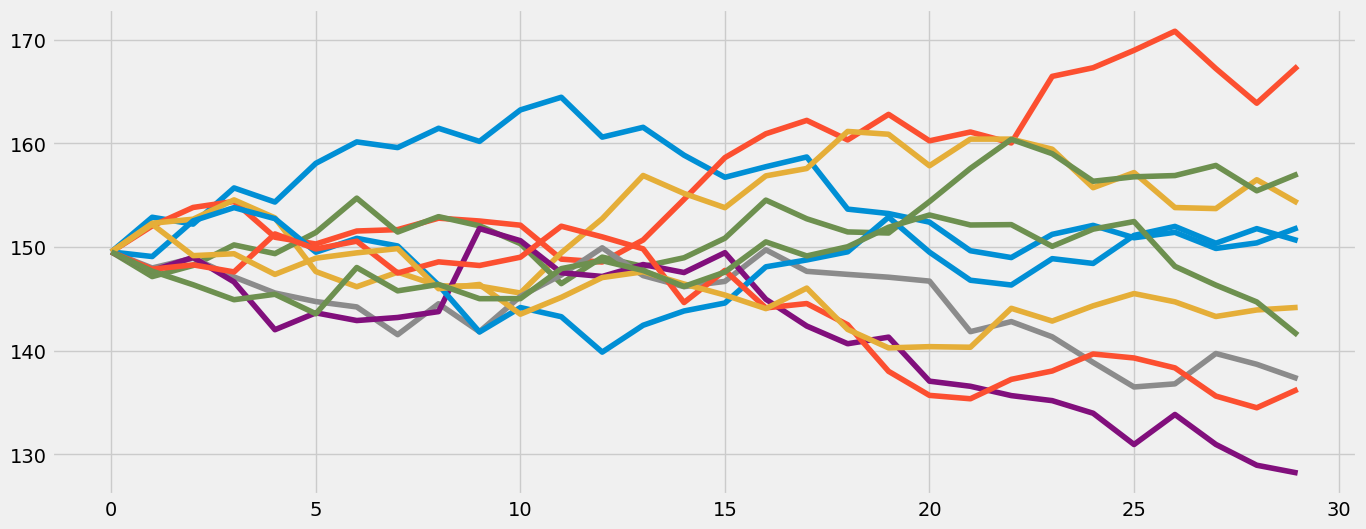

In [26]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_paths).iloc[:,0:10])

Text(0, 0.5, 'Frequency')

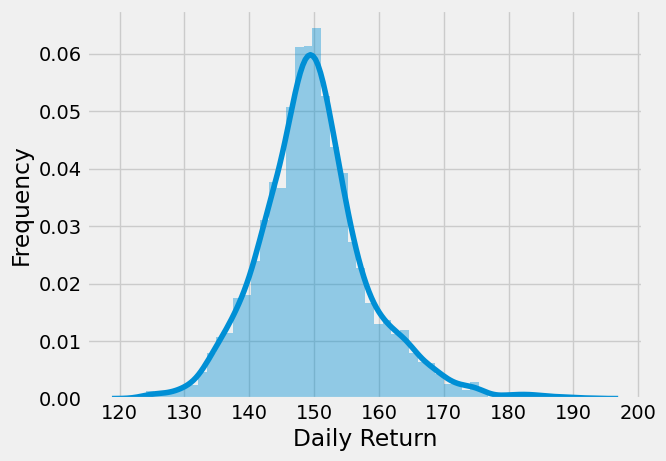

In [27]:
sns.distplot(pd.DataFrame(price_paths).iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [28]:

df1=pd.DataFrame(price_paths)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,...,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004
1,152.864259,152.031788,152.287571,147.139745,147.967247,147.712984,149.074223,147.852681,152.188636,147.658519,...,147.799166,149.641298,146.920513,153.725180,147.811747,152.126381,150.812002,148.692087,148.693835,146.844432
2,152.204338,153.811240,152.678669,148.211793,148.914972,148.988139,152.517328,148.271010,149.160420,146.350785,...,147.994981,148.047534,151.498099,151.209948,148.131988,150.136011,152.162424,148.713038,148.424002,146.149992
3,155.696628,154.392176,154.543056,150.195508,147.101545,146.624736,153.795224,147.588579,149.343917,144.906068,...,148.172535,147.553146,155.651897,149.785615,152.982751,151.448044,152.982509,151.672561,150.880677,143.356215
4,154.333238,150.936095,152.806286,149.356670,145.553307,142.011679,152.730175,151.256217,147.350050,145.431131,...,149.568037,147.082995,154.004117,151.552976,154.105252,150.586128,151.848461,150.173019,151.909906,144.258695


In [29]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,...,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004,149.520004
1,152.864259,152.031788,152.287571,147.139745,147.967247,147.712984,149.074223,147.852681,152.188636,147.658519,...,147.799166,149.641298,146.920513,153.725180,147.811747,152.126381,150.812002,148.692087,148.693835,146.844432
2,152.204338,153.811240,152.678669,148.211793,148.914972,148.988139,152.517328,148.271010,149.160420,146.350785,...,147.994981,148.047534,151.498099,151.209948,148.131988,150.136011,152.162424,148.713038,148.424002,146.149992
3,155.696628,154.392176,154.543056,150.195508,147.101545,146.624736,153.795224,147.588579,149.343917,144.906068,...,148.172535,147.553146,155.651897,149.785615,152.982751,151.448044,152.982509,151.672561,150.880677,143.356215
4,154.333238,150.936095,152.806286,149.356670,145.553307,142.011679,152.730175,151.256217,147.350050,145.431131,...,149.568037,147.082995,154.004117,151.552976,154.105252,150.586128,151.848461,150.173019,151.909906,144.258695


In [30]:
u1 = df1.mean()

In [31]:
var1 =df1.var()

In [32]:
u

Adj Close    0.000471
dtype: float64

In [33]:
stock_returns1 = np.log(1 + df1.pct_change())
stock_returns1.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
25,-0.007889,0.009993,0.009340,0.002746,-0.017190,-0.022782,0.018062,-0.002760,0.008160,0.004814,...,0.017891,-0.040761,-0.016781,-0.001792,0.005956,-0.004420,0.002886,0.005731,-0.008200,0.016750
26,0.003483,0.010849,-0.021710,0.000763,0.002193,0.021878,0.005722,-0.006892,-0.005487,-0.028774,...,-0.025017,0.019896,-0.026772,-0.001761,-0.011126,-0.015858,-0.003530,0.024532,0.005937,-0.022424
27,-0.010346,-0.021323,-0.000649,0.006199,0.021192,-0.021822,-0.010750,-0.019859,-0.009836,-0.012285,...,-0.029661,0.000818,-0.004862,0.030619,0.010864,0.010264,0.007858,-0.015357,0.008334,-0.004333
28,0.003574,-0.020189,0.017949,-0.015608,-0.007472,-0.015451,0.009336,-0.008362,0.004400,-0.011171,...,-0.024245,-0.016634,-0.008213,-0.020727,0.010235,0.018566,-0.004490,-0.013257,0.009494,-0.004928
29,0.009674,0.021574,-0.014433,0.010382,-0.010051,-0.005875,-0.007655,0.013128,0.001725,-0.022311,...,0.011400,-0.016621,0.016702,-0.002615,-0.008114,0.003314,-0.005368,-0.010560,0.002397,-0.034614


In [34]:
u1 = stock_returns1 .mean()
var =df1.var()
u1

0     0.000534
1     0.003905
2     0.001073
3     0.001693
4    -0.002943
        ...   
95   -0.003448
96    0.005341
97   -0.001081
98   -0.001032
99   -0.005079
Length: 100, dtype: float64

# Time Series Analysis

## SMA

In [35]:
ticker ='WMT'
df=pdr.get_data_yahoo(ticker, start='2019-04-08')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-11,151.000000,151.000000,149.619995,150.070007,150.070007,6123500
2023-04-12,149.789993,150.970001,149.169998,149.339996,149.339996,3736600
2023-04-13,149.649994,150.000000,148.199997,149.490005,149.490005,4424200
2023-04-14,149.029999,149.889999,148.149994,148.479996,148.479996,3488300
2023-04-17,148.639999,149.669998,148.500000,149.520004,149.520004,5158479


In [36]:
df.index = pd.to_datetime(df.index)

In [37]:
df.index = df.index.date

print(df.head())

                  Open        High         Low       Close  Adj Close   Volume
2019-04-08   98.449997   99.250000   98.260002   99.230003  92.826881  5422400
2019-04-09   98.800003   99.230003   98.150002   98.690002  92.321724  4367500
2019-04-10   98.510002   99.720001   98.500000   99.599998  93.172997  4091100
2019-04-11   99.699997  100.830002   99.470001  100.800003  94.295563  5606900
2019-04-12  101.000000  102.019997  101.000000  101.559998  95.006523  5162000


In [38]:
# drop unwanted columns
df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1, inplace=True)
df

,Close
2019-04-08,99.230003
2019-04-09,98.690002
2019-04-10,99.599998
2019-04-11,100.800003
2019-04-12,101.559998
...,...
2023-04-11,150.070007
2023-04-12,149.339996
2023-04-13,149.490005
2023-04-14,148.479996


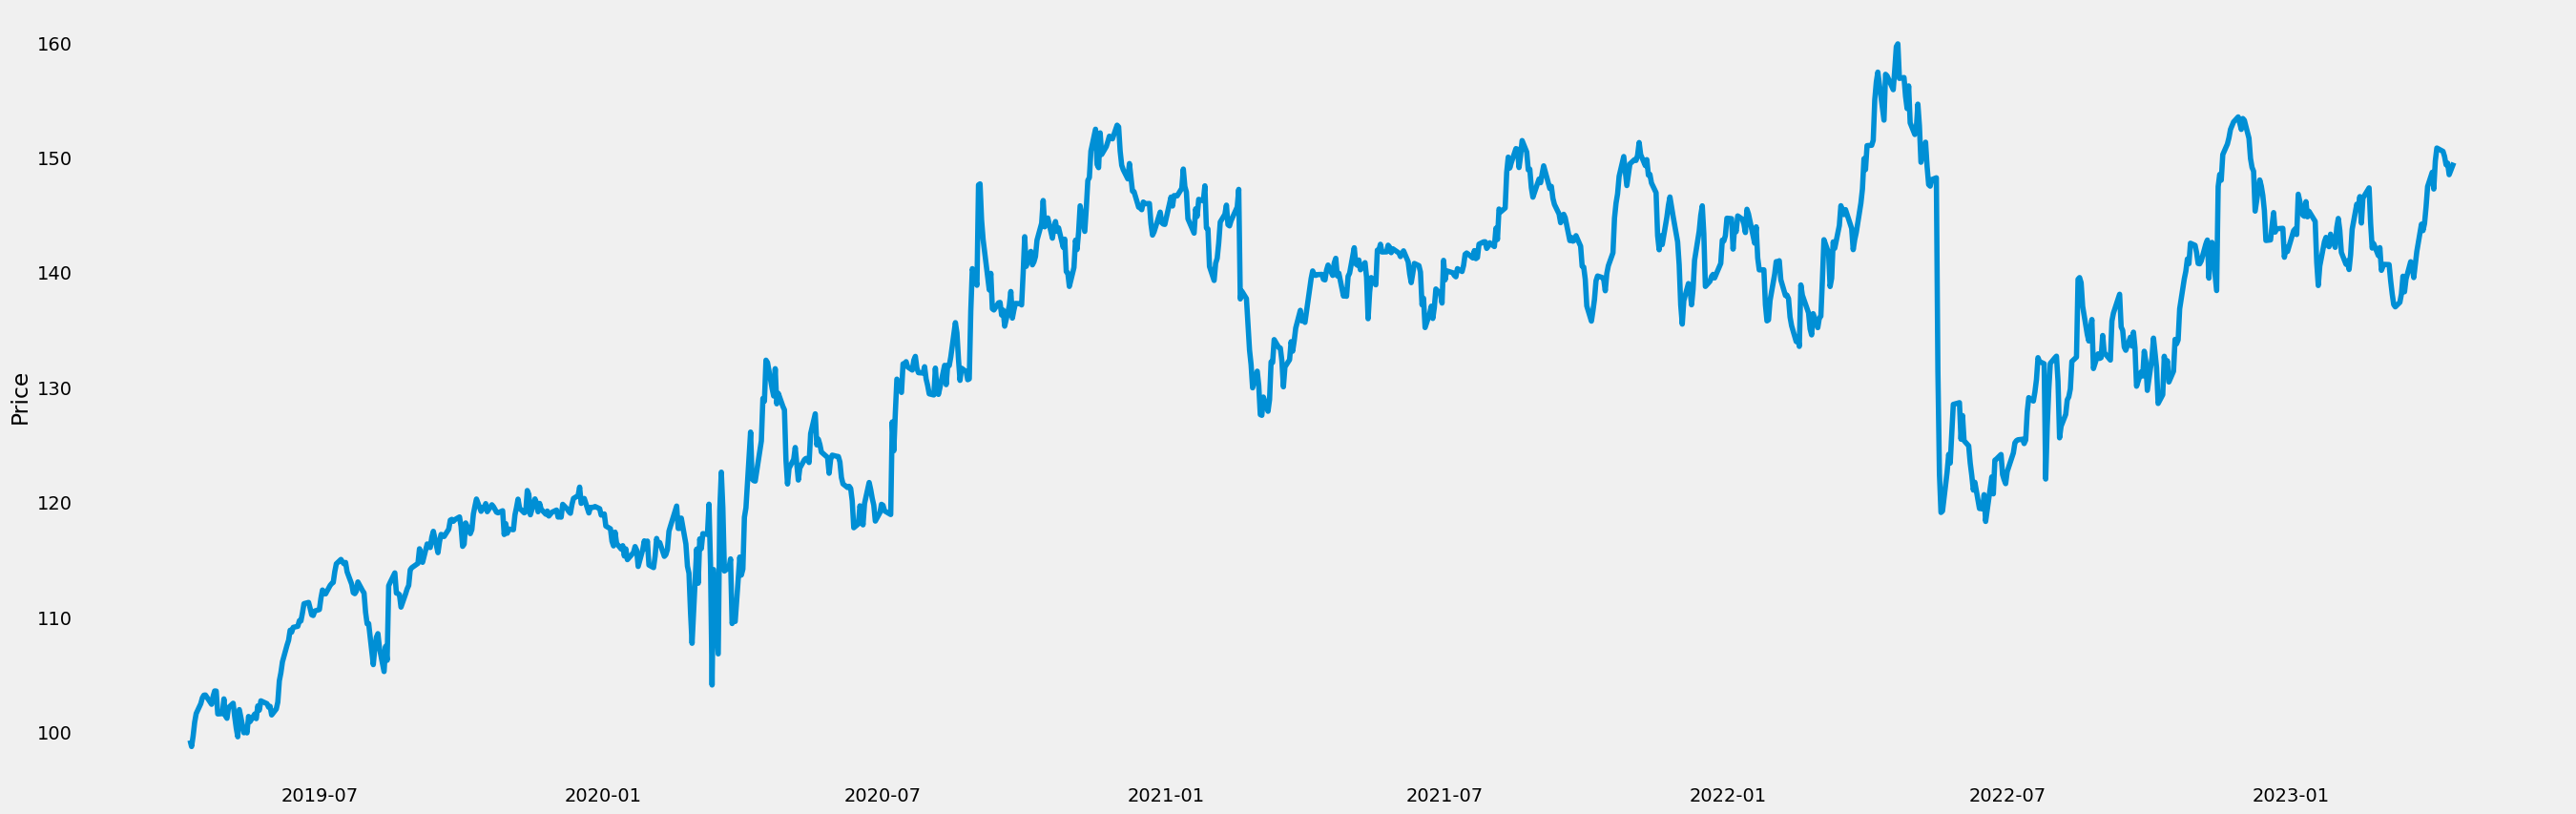

In [39]:
df['Close'].plot(figsize = (30, 10))
plt.grid()
plt.ylabel("Price")
plt.show()

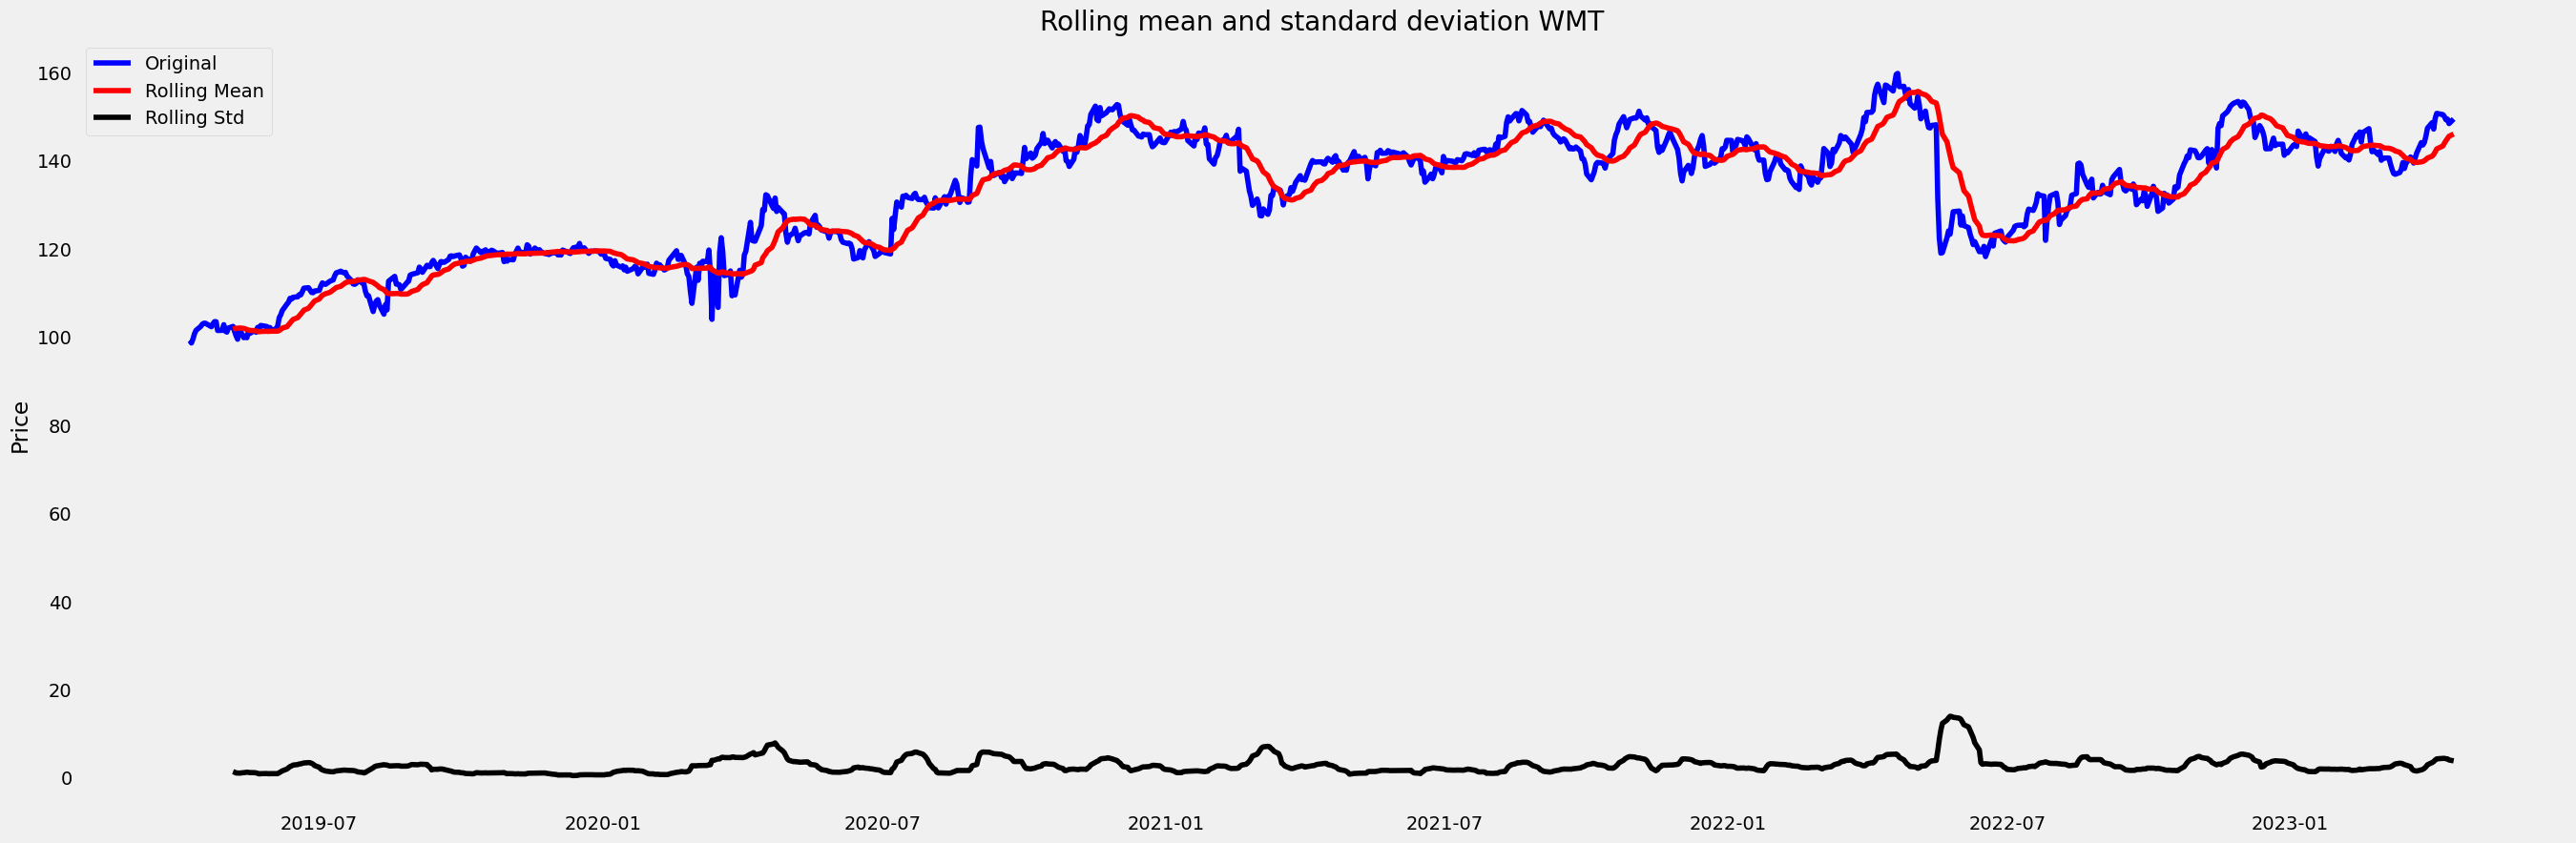

In [40]:
rolling_mean = df['Close'].rolling(20).mean()
rolling_std = df['Close'].rolling(20).std()

plt.figure(figsize = (30, 10))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'WMT')
plt.grid()
plt.ylabel("Price")
plt.show()

In [41]:
df['SMA50'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
df['SMA100'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
df

,Close,SMA50,SMA100
2019-04-08,99.230003,99.230003,99.230003
2019-04-09,98.690002,98.960003,98.960003
2019-04-10,99.599998,99.173335,99.173335
2019-04-11,100.800003,99.580002,99.580002
2019-04-12,101.559998,99.976001,99.976001
...,...,...,...
2023-04-11,150.070007,144.040499,142.863200
2023-04-12,149.339996,144.602499,143.007000
2023-04-13,149.490005,145.094999,143.119400
2023-04-14,148.479996,145.604999,143.195600


In [42]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA50'] > df['SMA100'], 1.0, 0.0)

In [43]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

,Close,SMA50,SMA100,Signal,Position
2019-04-08,99.230003,99.230003,99.230003,0.0,NaN
2019-04-09,98.690002,98.960003,98.960003,0.0,0.0
2019-04-10,99.599998,99.173335,99.173335,0.0,0.0
2019-04-11,100.800003,99.580002,99.580002,0.0,0.0
2019-04-12,101.559998,99.976001,99.976001,0.0,0.0


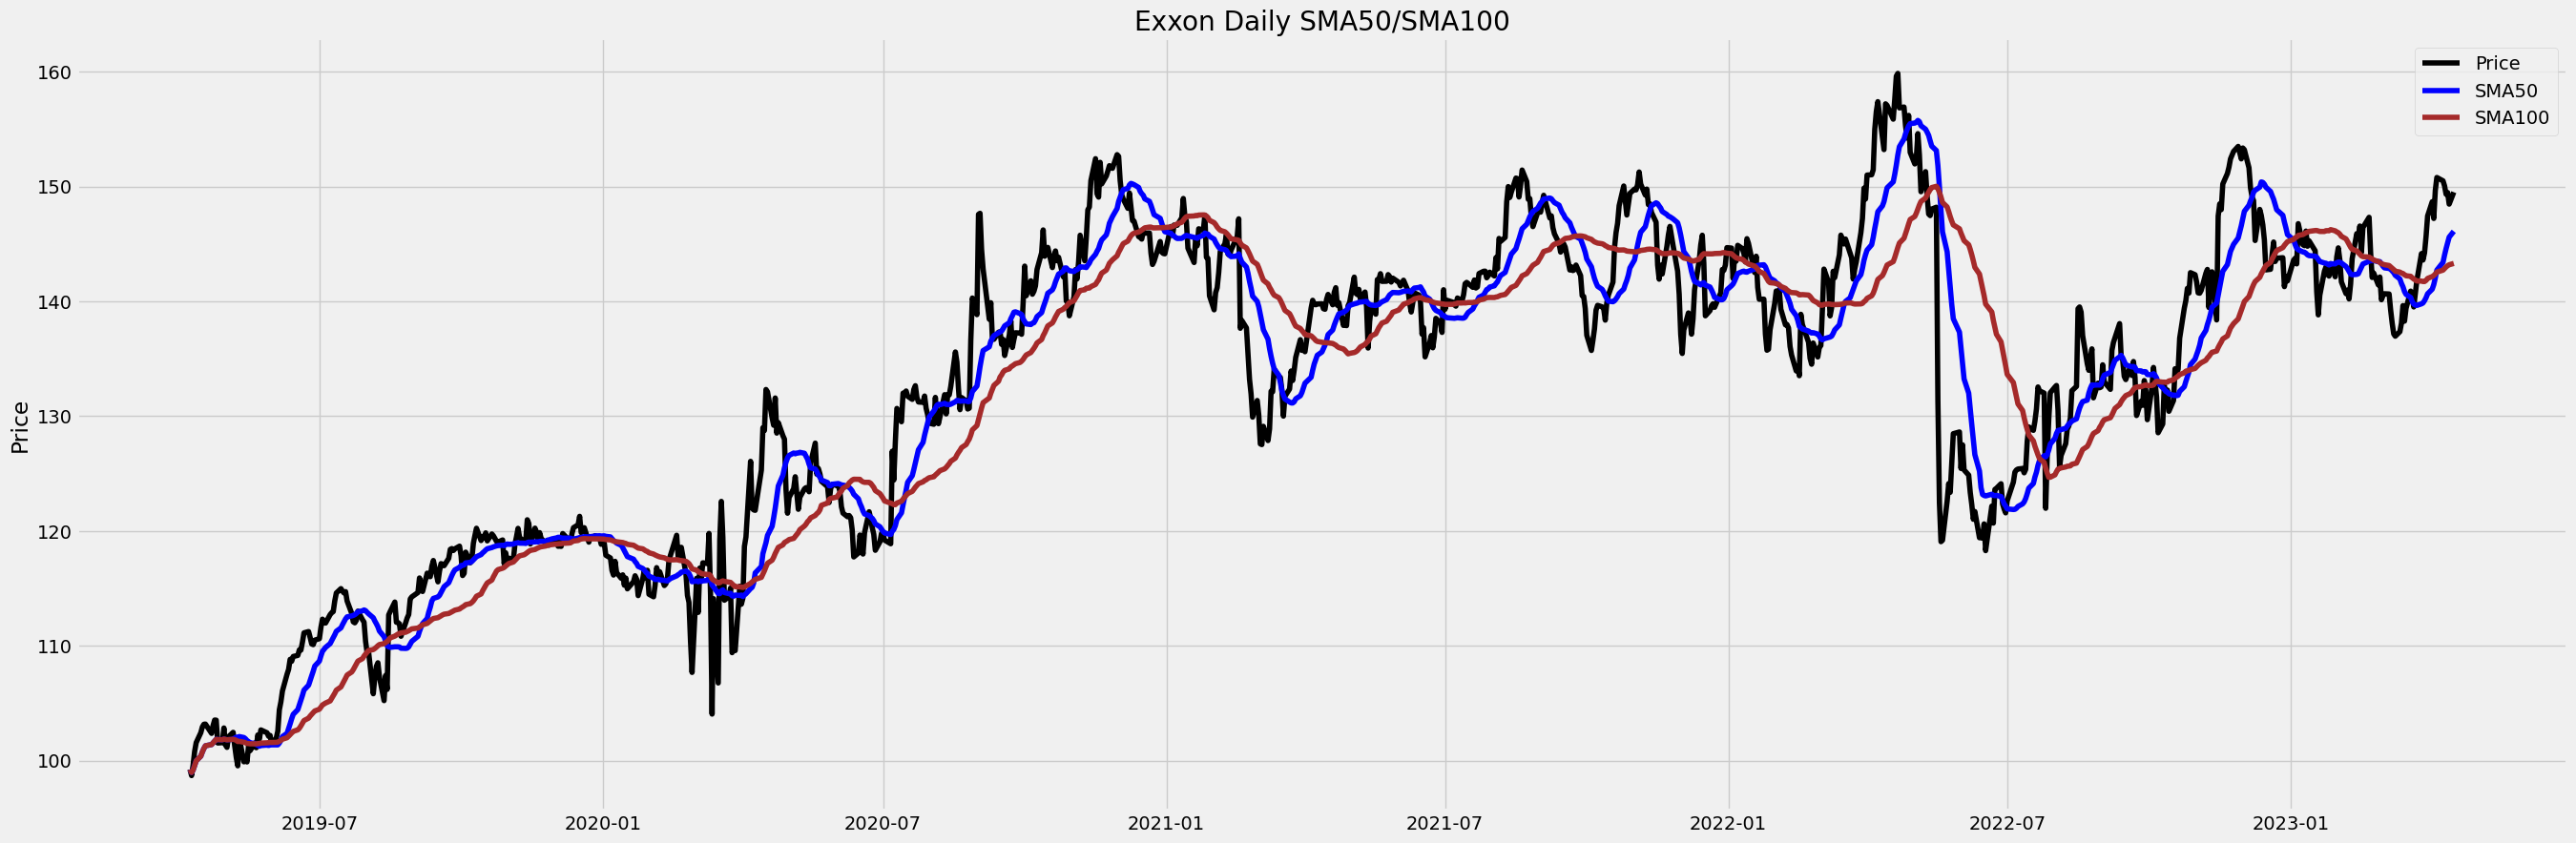

In [44]:
plt.figure(figsize=(30,10))
plt.plot(df["Close"], color="BLACK", label="Price")
plt.plot(df["SMA50"], color="BLUE", label="SMA50")
plt.plot(df["SMA100"], color="BROWN", label="SMA100")
plt.ylabel("Price")
plt.title("Exxon Daily SMA50/SMA100")
plt.legend()
plt.show()

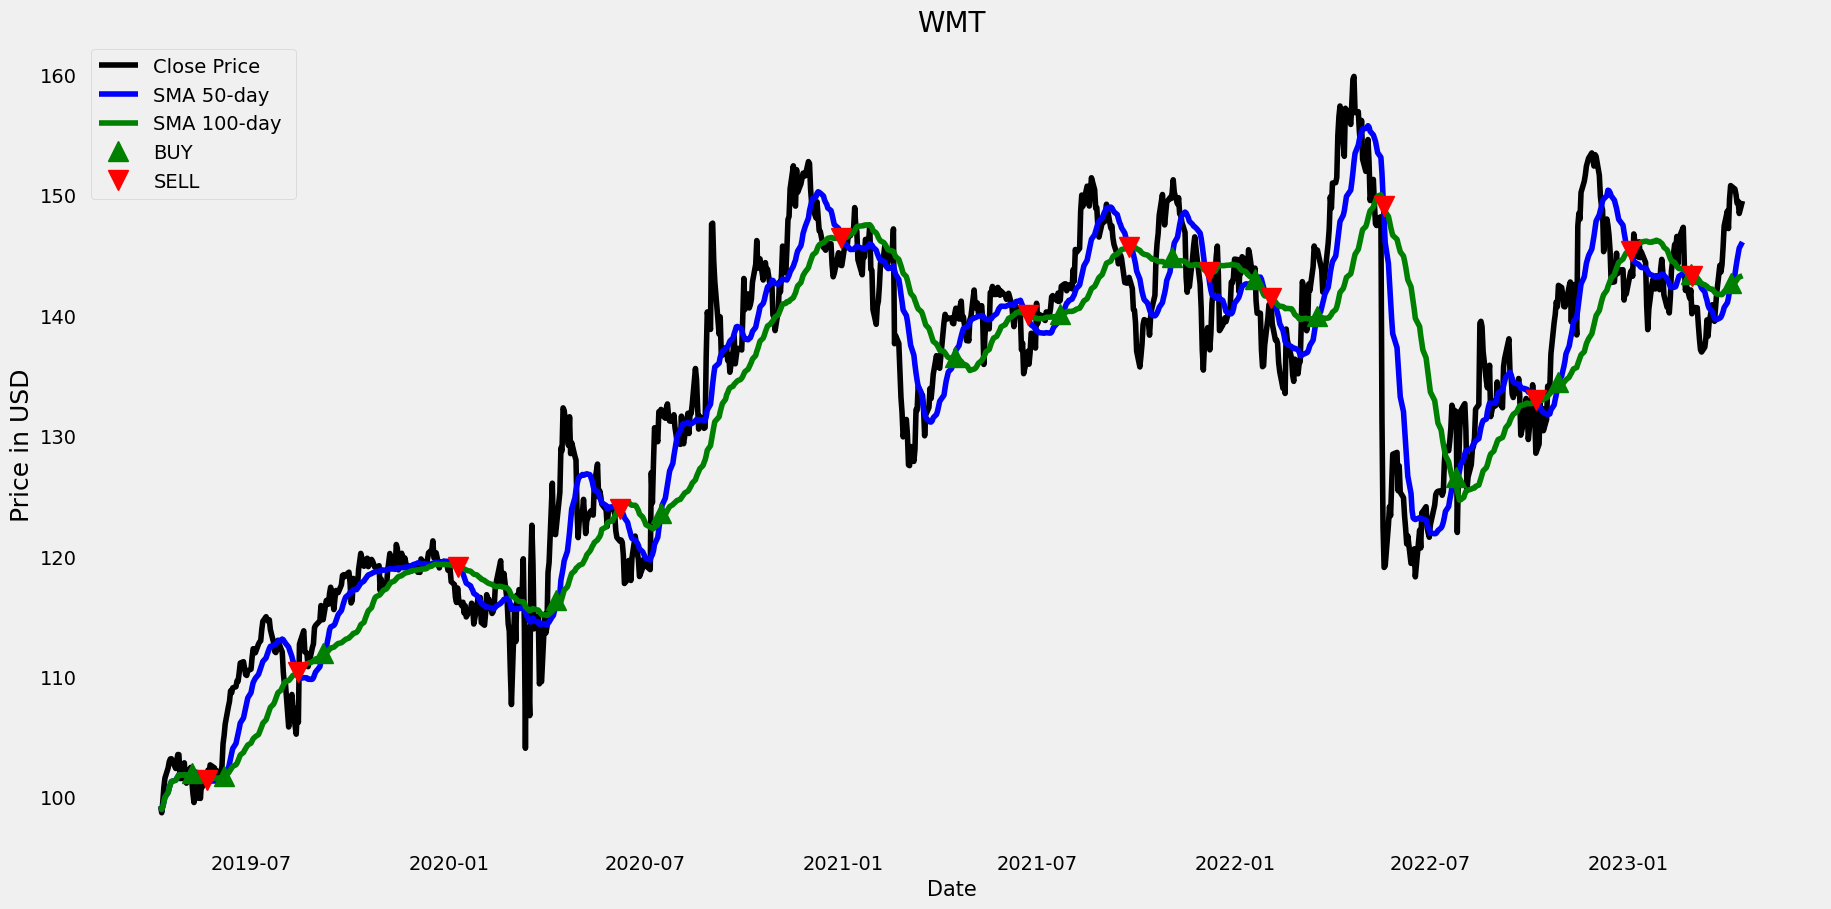

In [47]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close Price') 
df['SMA50'].plot(color = 'b',label = 'SMA 50-day ') 
df['SMA100'].plot(color = 'g', label = 'SMA 100-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA50'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA100'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(ticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [48]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+------------+---------+---------+----------+----------+------------+
|            |   Close |   SMA50 |   SMA100 |   Signal | Position   |
|------------+---------+---------+----------+----------+------------|
| 2019-05-07 |  101.3  | 101.956 |  101.826 |        1 | Buy        |
| 2019-05-21 |  101.12 | 101.397 |  101.451 |        0 | Sell       |
| 2019-06-06 |  105.11 | 101.765 |  101.761 |        1 | Buy        |
| 2019-08-14 |  106.2  | 110.009 |  110.366 |        0 | Sell       |
| 2019-09-06 |  114.73 | 111.93  |  111.824 |        1 | Buy        |
| 2020-01-09 |  117.36 | 119.078 |  119.079 |        0 | Sell       |
| 2020-04-09 |  121.8  | 116.351 |  115.786 |        1 | Buy        |
| 2020-06-08 |  121.24 | 123.913 |  123.954 |        0 | Sell       |
| 2020-07-16 |  132.2  | 123.555 |  123.092 |        1 | Buy        |
| 2020-12-30 |  144.18 | 146.395 |  146.44  |        0 | Sell       |
| 2021-04-15 |  140.16 | 136.582 |  136.407 |        1 | Buy        |
| 2021-06-22 |  137.

# Bollinger Bands
   #####  movement of price and volatility over the time

In [49]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df['upper_bb'], df['lower_bb'] = bb(df['Close'], df['SMA50'], 20)
df.tail()

,Close,SMA50,SMA100,Signal,Position,upper_bb,lower_bb
2023-04-11,150.070007,144.040499,142.8632,1.0,0.0,152.880513,135.200486
2023-04-12,149.339996,144.602499,143.0070,1.0,0.0,153.280008,135.924989
2023-04-13,149.490005,145.094999,143.1194,1.0,0.0,153.704434,136.485564
2023-04-14,148.479996,145.604999,143.1956,1.0,0.0,153.708192,137.501806
2023-04-17,149.520004,146.110999,143.3136,1.0,0.0,153.837886,138.384112


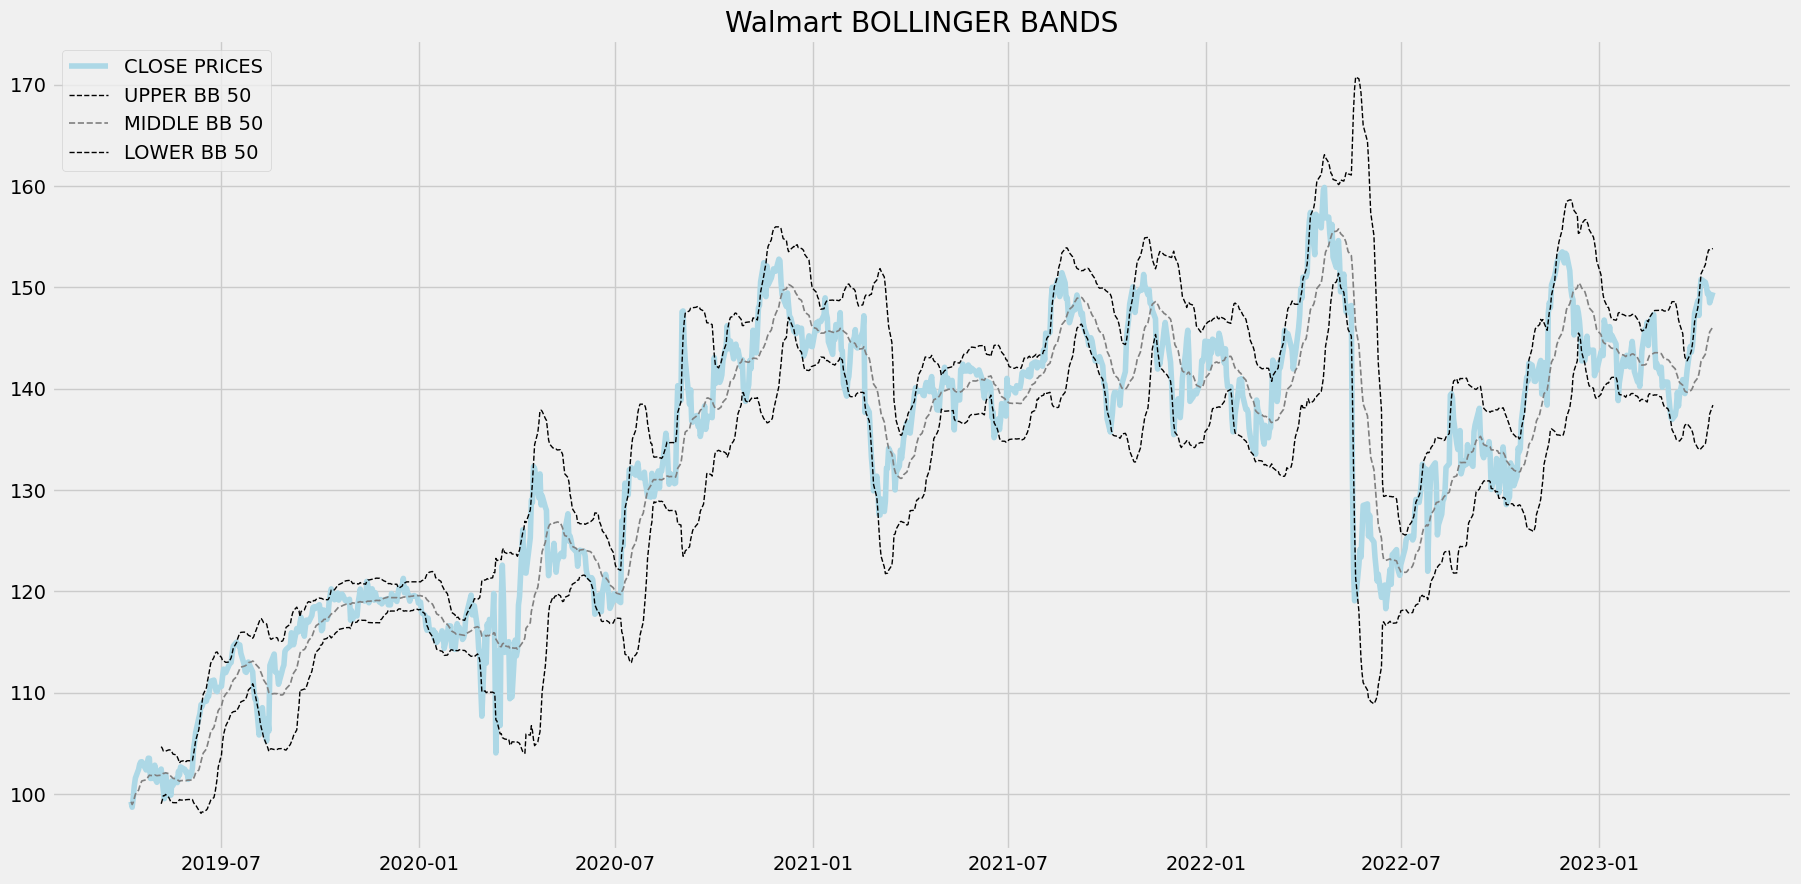

In [50]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', color = 'lightblue')
df['upper_bb'].plot(label = 'UPPER BB 50', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB 50', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB 50', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('Walmart BOLLINGER BANDS')
plt.show()

In [51]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['Close'], df['lower_bb'], df['upper_bb'])


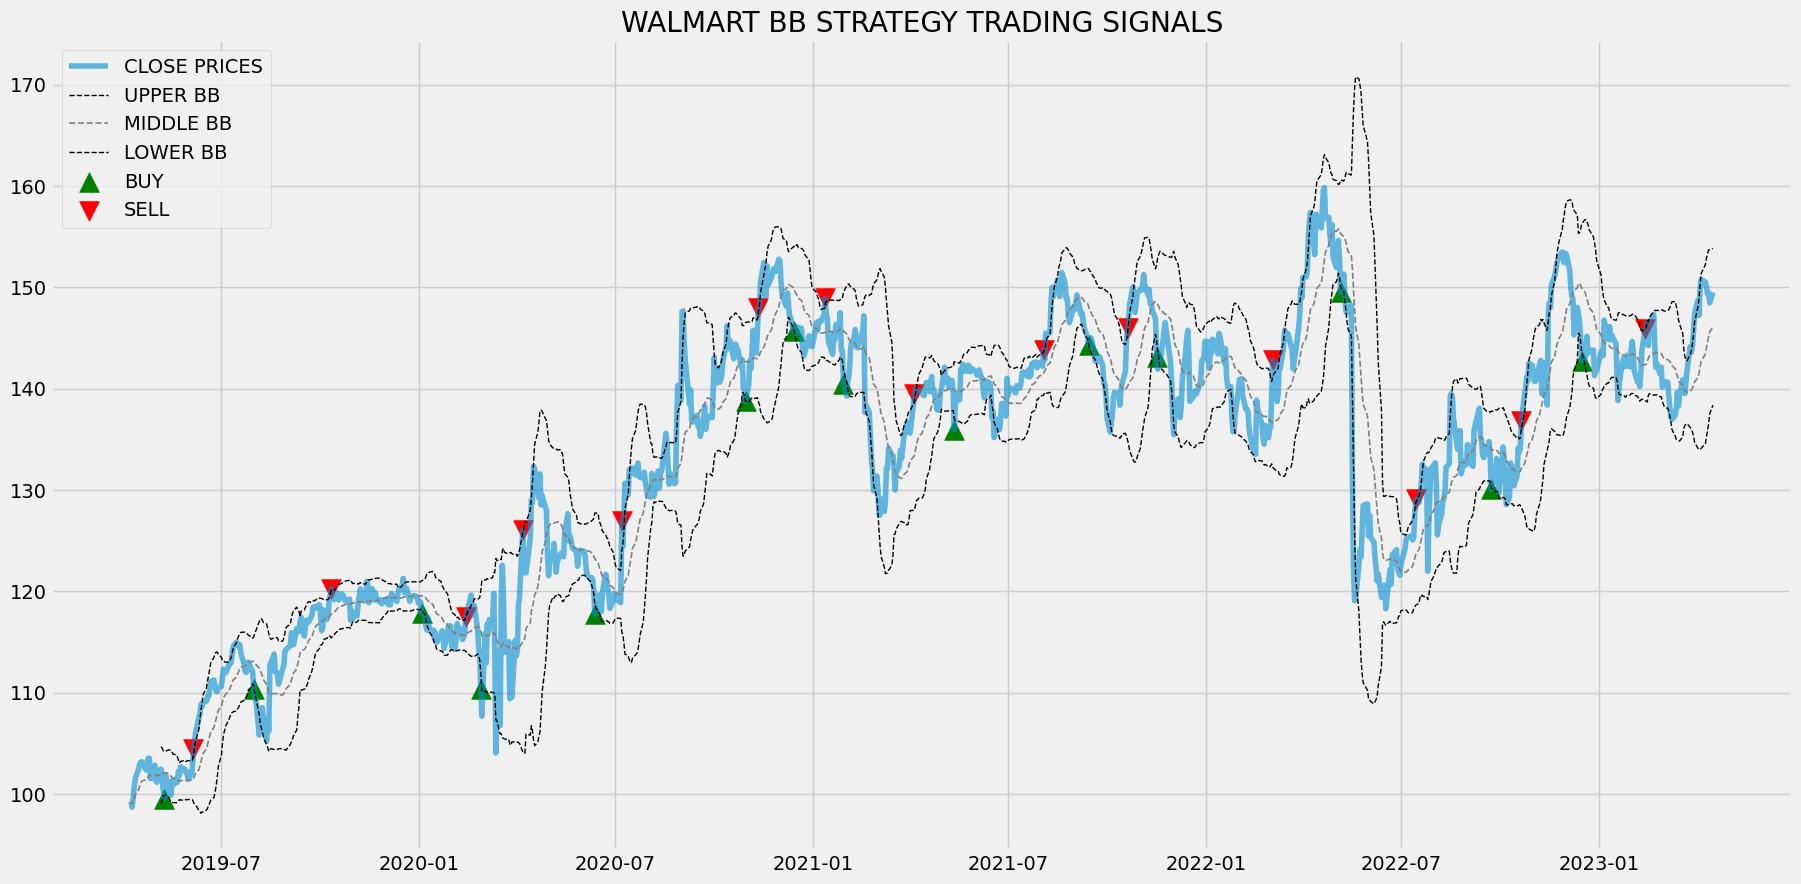

In [52]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.6)
df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('WALMART BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting

In [54]:
ticker ='WMT'
df=pdr.get_data_yahoo(ticker, start='2019-4-8')

[*********************100%***********************]  1 of 1 completed


In [55]:
#df.index = pd.to_datetime(df.index)

In [56]:
df.index = df.index.date
df.index.name = 'Date'
df.reset_index()
print(df.head())

                  Open        High         Low       Close  Adj Close   Volume
Date                                                                          
2019-04-08   98.449997   99.250000   98.260002   99.230003  92.826889  5422400
2019-04-09   98.800003   99.230003   98.150002   98.690002  92.321724  4367500
2019-04-10   98.510002   99.720001   98.500000   99.599998  93.172989  4091100
2019-04-11   99.699997  100.830002   99.470001  100.800003  94.295555  5606900
2019-04-12  101.000000  102.019997  101.000000  101.559998  95.006538  5162000


In [57]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-08,98.449997,99.250000,98.260002,99.230003,92.826889,5422400
2019-04-09,98.800003,99.230003,98.150002,98.690002,92.321724,4367500
2019-04-10,98.510002,99.720001,98.500000,99.599998,93.172989,4091100
2019-04-11,99.699997,100.830002,99.470001,100.800003,94.295555,5606900
2019-04-12,101.000000,102.019997,101.000000,101.559998,95.006538,5162000
...,...,...,...,...,...,...
2023-04-11,151.000000,151.000000,149.619995,150.070007,150.070007,6123500
2023-04-12,149.789993,150.970001,149.169998,149.339996,149.339996,3736600
2023-04-13,149.649994,150.000000,148.199997,149.490005,149.490005,4424200


In [58]:
print (f"start date : {str(df.index.min())}")
print (f"end date : {str(df.index.max())}")

start date : 2019-04-08
end date : 2023-04-17


In [59]:
df=df.reset_index()
df[['ds','y']]= df[['Date','Close']]

In [60]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2019-04-08,98.449997,99.250000,98.260002,99.230003,92.826889,5422400,2019-04-08,99.230003
1,2019-04-09,98.800003,99.230003,98.150002,98.690002,92.321724,4367500,2019-04-09,98.690002
2,2019-04-10,98.510002,99.720001,98.500000,99.599998,93.172989,4091100,2019-04-10,99.599998
3,2019-04-11,99.699997,100.830002,99.470001,100.800003,94.295555,5606900,2019-04-11,100.800003
4,2019-04-12,101.000000,102.019997,101.000000,101.559998,95.006538,5162000,2019-04-12,101.559998
...,...,...,...,...,...,...,...,...,...
1009,2023-04-11,151.000000,151.000000,149.619995,150.070007,150.070007,6123500,2023-04-11,150.070007
1010,2023-04-12,149.789993,150.970001,149.169998,149.339996,149.339996,3736600,2023-04-12,149.339996
1011,2023-04-13,149.649994,150.000000,148.199997,149.490005,149.490005,4424200,2023-04-13,149.490005
1012,2023-04-14,149.029999,149.889999,148.149994,148.479996,148.479996,3488300,2023-04-14,148.479996


In [61]:
ph_df=df.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [62]:
ph_df.head()

,ds,y
0,2019-04-08,99.230003
1,2019-04-09,98.690002
2,2019-04-10,99.599998
3,2019-04-11,100.800003
4,2019-04-12,101.559998


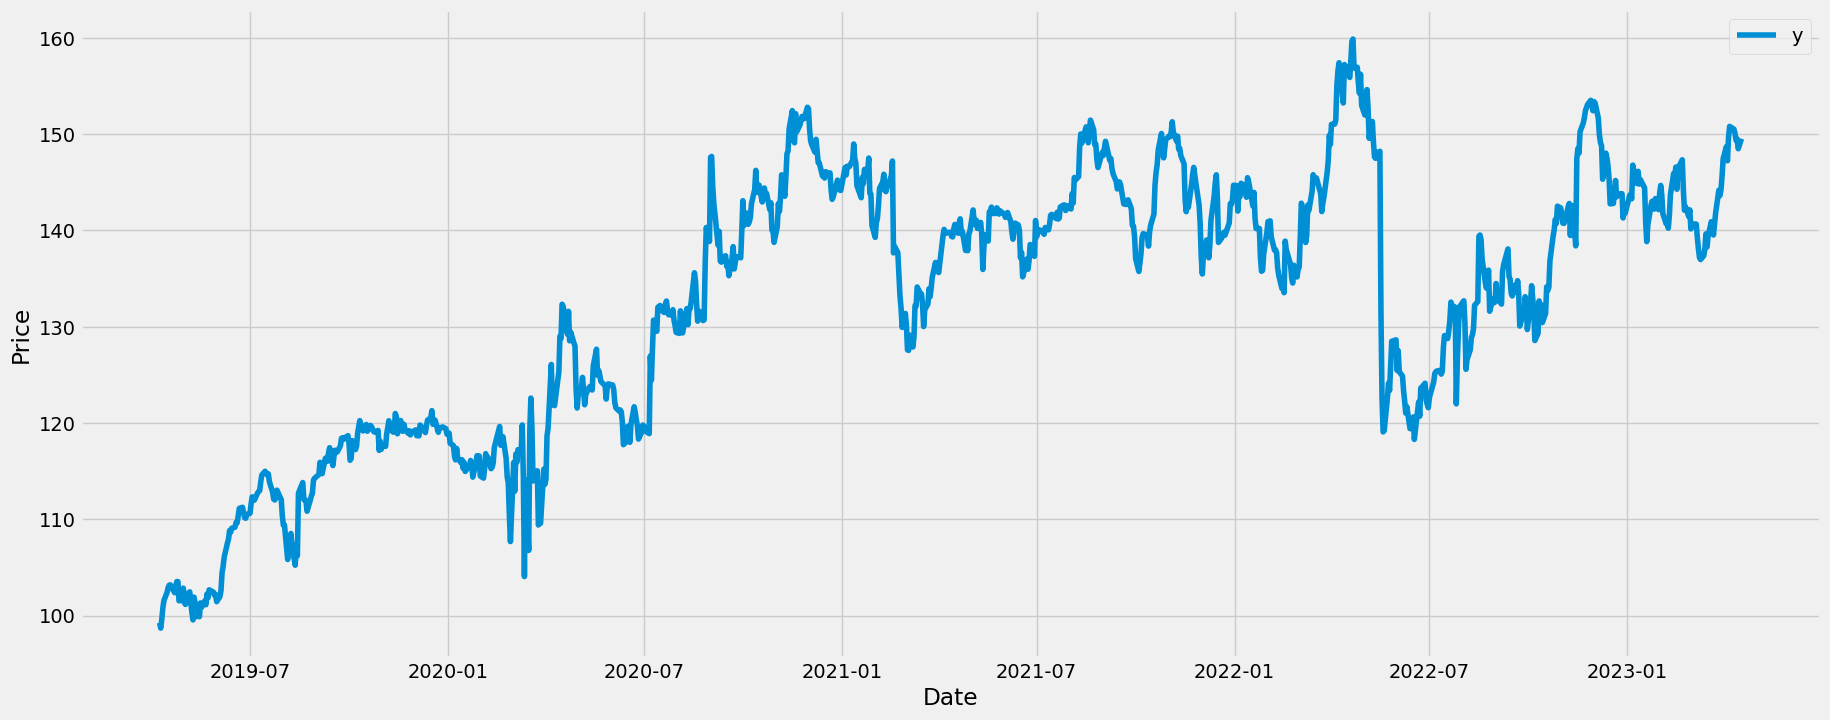

In [64]:
ax = ph_df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [66]:
import plotly.express as px
fig = go.Figure([go.Scatter(x=ph_df['ds'], y=ph_df['y'])])
fig.update_layout(title_text="Actual Prices")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="Price")
fig.show()

In [67]:
model = Prophet(daily_seasonality=True)
model.fit(ph_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ni4v1_o/f97febhh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ni4v1_o/4obsdg1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17279', 'data', 'file=/tmp/tmp0ni4v1_o/f97febhh.json', 'init=/tmp/tmp0ni4v1_o/4obsdg1z.json', 'output', 'file=/tmp/tmp0ni4v1_o/prophet_model8hbpbsa1/prophet_model-20230417205933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:59:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:59:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [68]:
future=model.make_future_dataframe(periods=365,freq='D')

In [69]:
predictions=model.predict(future)

In [70]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1374,2024-04-12,177.284907,141.484143,224.702253,138.818705,220.915300,3.131665,3.131665,3.131665,-0.63675,...,0.000241,0.000241,0.000241,3.768174,3.768174,3.768174,0.0,0.0,0.0,180.416572
1375,2024-04-13,177.358774,142.877057,223.820983,138.838848,221.144535,3.607516,3.607516,3.607516,-0.63675,...,0.079594,0.079594,0.079594,4.164672,4.164672,4.164672,0.0,0.0,0.0,180.966290
1376,2024-04-14,177.432642,142.296807,225.229545,138.876518,221.373769,3.976854,3.976854,3.976854,-0.63675,...,0.079594,0.079594,0.079594,4.534010,4.534010,4.534010,0.0,0.0,0.0,181.409496
1377,2024-04-15,177.506510,143.158171,226.381493,138.823208,221.603004,4.215466,4.215466,4.215466,-0.63675,...,-0.020460,-0.020460,-0.020460,4.872677,4.872677,4.872677,0.0,0.0,0.0,181.721976
1378,2024-04-16,177.580377,142.892499,226.755015,138.737143,221.818607,4.678794,4.678794,4.678794,-0.63675,...,0.138293,0.138293,0.138293,5.177250,5.177250,5.177250,0.0,0.0,0.0,182.259171


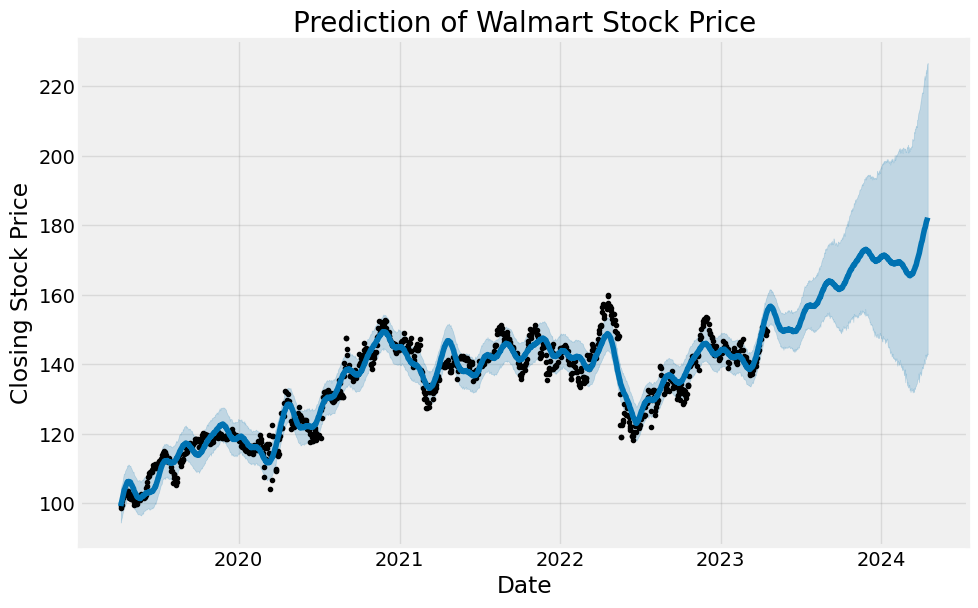

,ds,yhat,yhat_lower,yhat_upper
1374,2024-04-12,180.416572,141.484143,224.702253
1375,2024-04-13,180.966290,142.877057,223.820983
1376,2024-04-14,181.409496,142.296807,225.229545
1377,2024-04-15,181.721976,143.158171,226.381493
1378,2024-04-16,182.259171,142.892499,226.755015


In [72]:
model.plot(predictions)
plt.title("Prediction of Walmart Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()
predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

The given dataset appears to contain predictions of Walmart's stock prices on different dates in April 2024. The 'ds' column contains the date of each prediction, while the 'yhat', 'yhat_lower', and 'yhat_upper' columns represent the predicted stock price, lower bound, and upper bound of the predicted stock price, respectively.

Based on the analysis of the dataset, the model predicts that Walmart's stock price will gradually increase over the course of April 2024. Specifically, the predicted stock price is $176.88 on April 1st, $177.56 on April 2nd, $177.76 on April 3rd, $178.23 on April 4th, and $178.91 on April 5th. However, it's important to keep in mind that stock prices are highly volatile and are 
influenced by numerous external factors, which means that the accuracy of these predictions is uncertain.

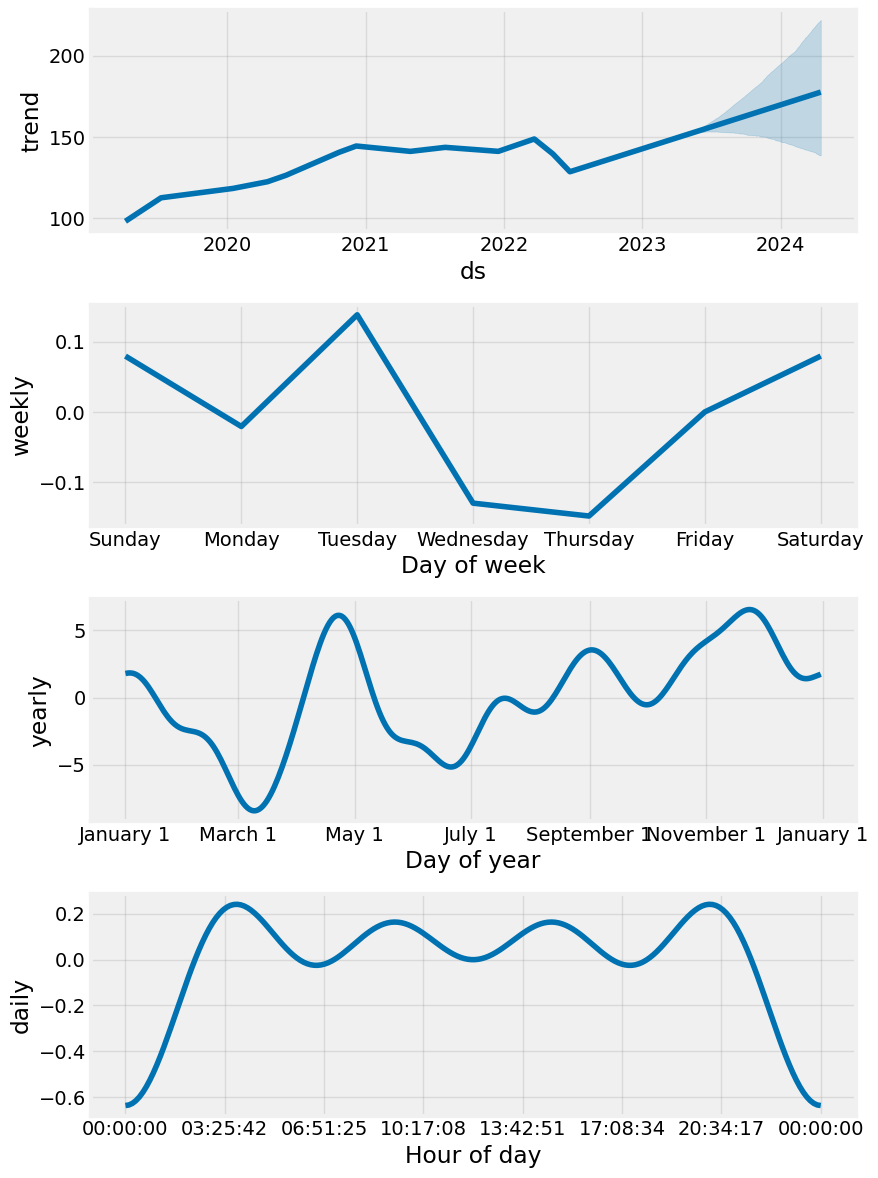

In [73]:
model.plot_components(predictions)
plt.show()

In [74]:
from prophet.plot import plot_plotly
plot_plotly(model,predictions)